# The Gamma Function

## Introduction

The Gamma function, denoted $\Gamma(z)$, is one of the most important special functions in mathematics. It extends the factorial function to complex and real number arguments. While the factorial $n!$ is defined only for non-negative integers, the Gamma function provides a smooth interpolation that agrees with factorials at positive integers.

## Definition

The Gamma function is defined by the improper integral:

$$\Gamma(z) = \int_0^{\infty} t^{z-1} e^{-t} \, dt$$

This integral converges for all complex numbers $z$ with positive real part, i.e., $\text{Re}(z) > 0$.

## Fundamental Properties

### Recurrence Relation

The Gamma function satisfies the fundamental recurrence relation:

$$\Gamma(z+1) = z \cdot \Gamma(z)$$

This can be proven via integration by parts. For positive integers $n$, this yields:

$$\Gamma(n+1) = n!$$

### Special Values

- $\Gamma(1) = 1$
- $\Gamma(2) = 1$
- $\Gamma(n) = (n-1)!$ for positive integers $n$
- $\Gamma\left(\frac{1}{2}\right) = \sqrt{\pi}$

### Reflection Formula (Euler)

$$\Gamma(z) \Gamma(1-z) = \frac{\pi}{\sin(\pi z)}$$

### Duplication Formula (Legendre)

$$\Gamma(z) \Gamma\left(z + \frac{1}{2}\right) = \frac{\sqrt{\pi}}{2^{2z-1}} \Gamma(2z)$$

### Stirling's Approximation

For large $|z|$:

$$\Gamma(z) \sim \sqrt{\frac{2\pi}{z}} \left(\frac{z}{e}\right)^z$$

## Computational Implementation

We will now explore the Gamma function computationally using Python. We'll visualize the function, verify its properties, and examine its behavior.

In [1]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt

# Set up the plotting style
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 11
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

### Visualizing the Gamma Function

The Gamma function has poles (singularities) at zero and all negative integers. Between these poles, the function alternates between positive and negative values.

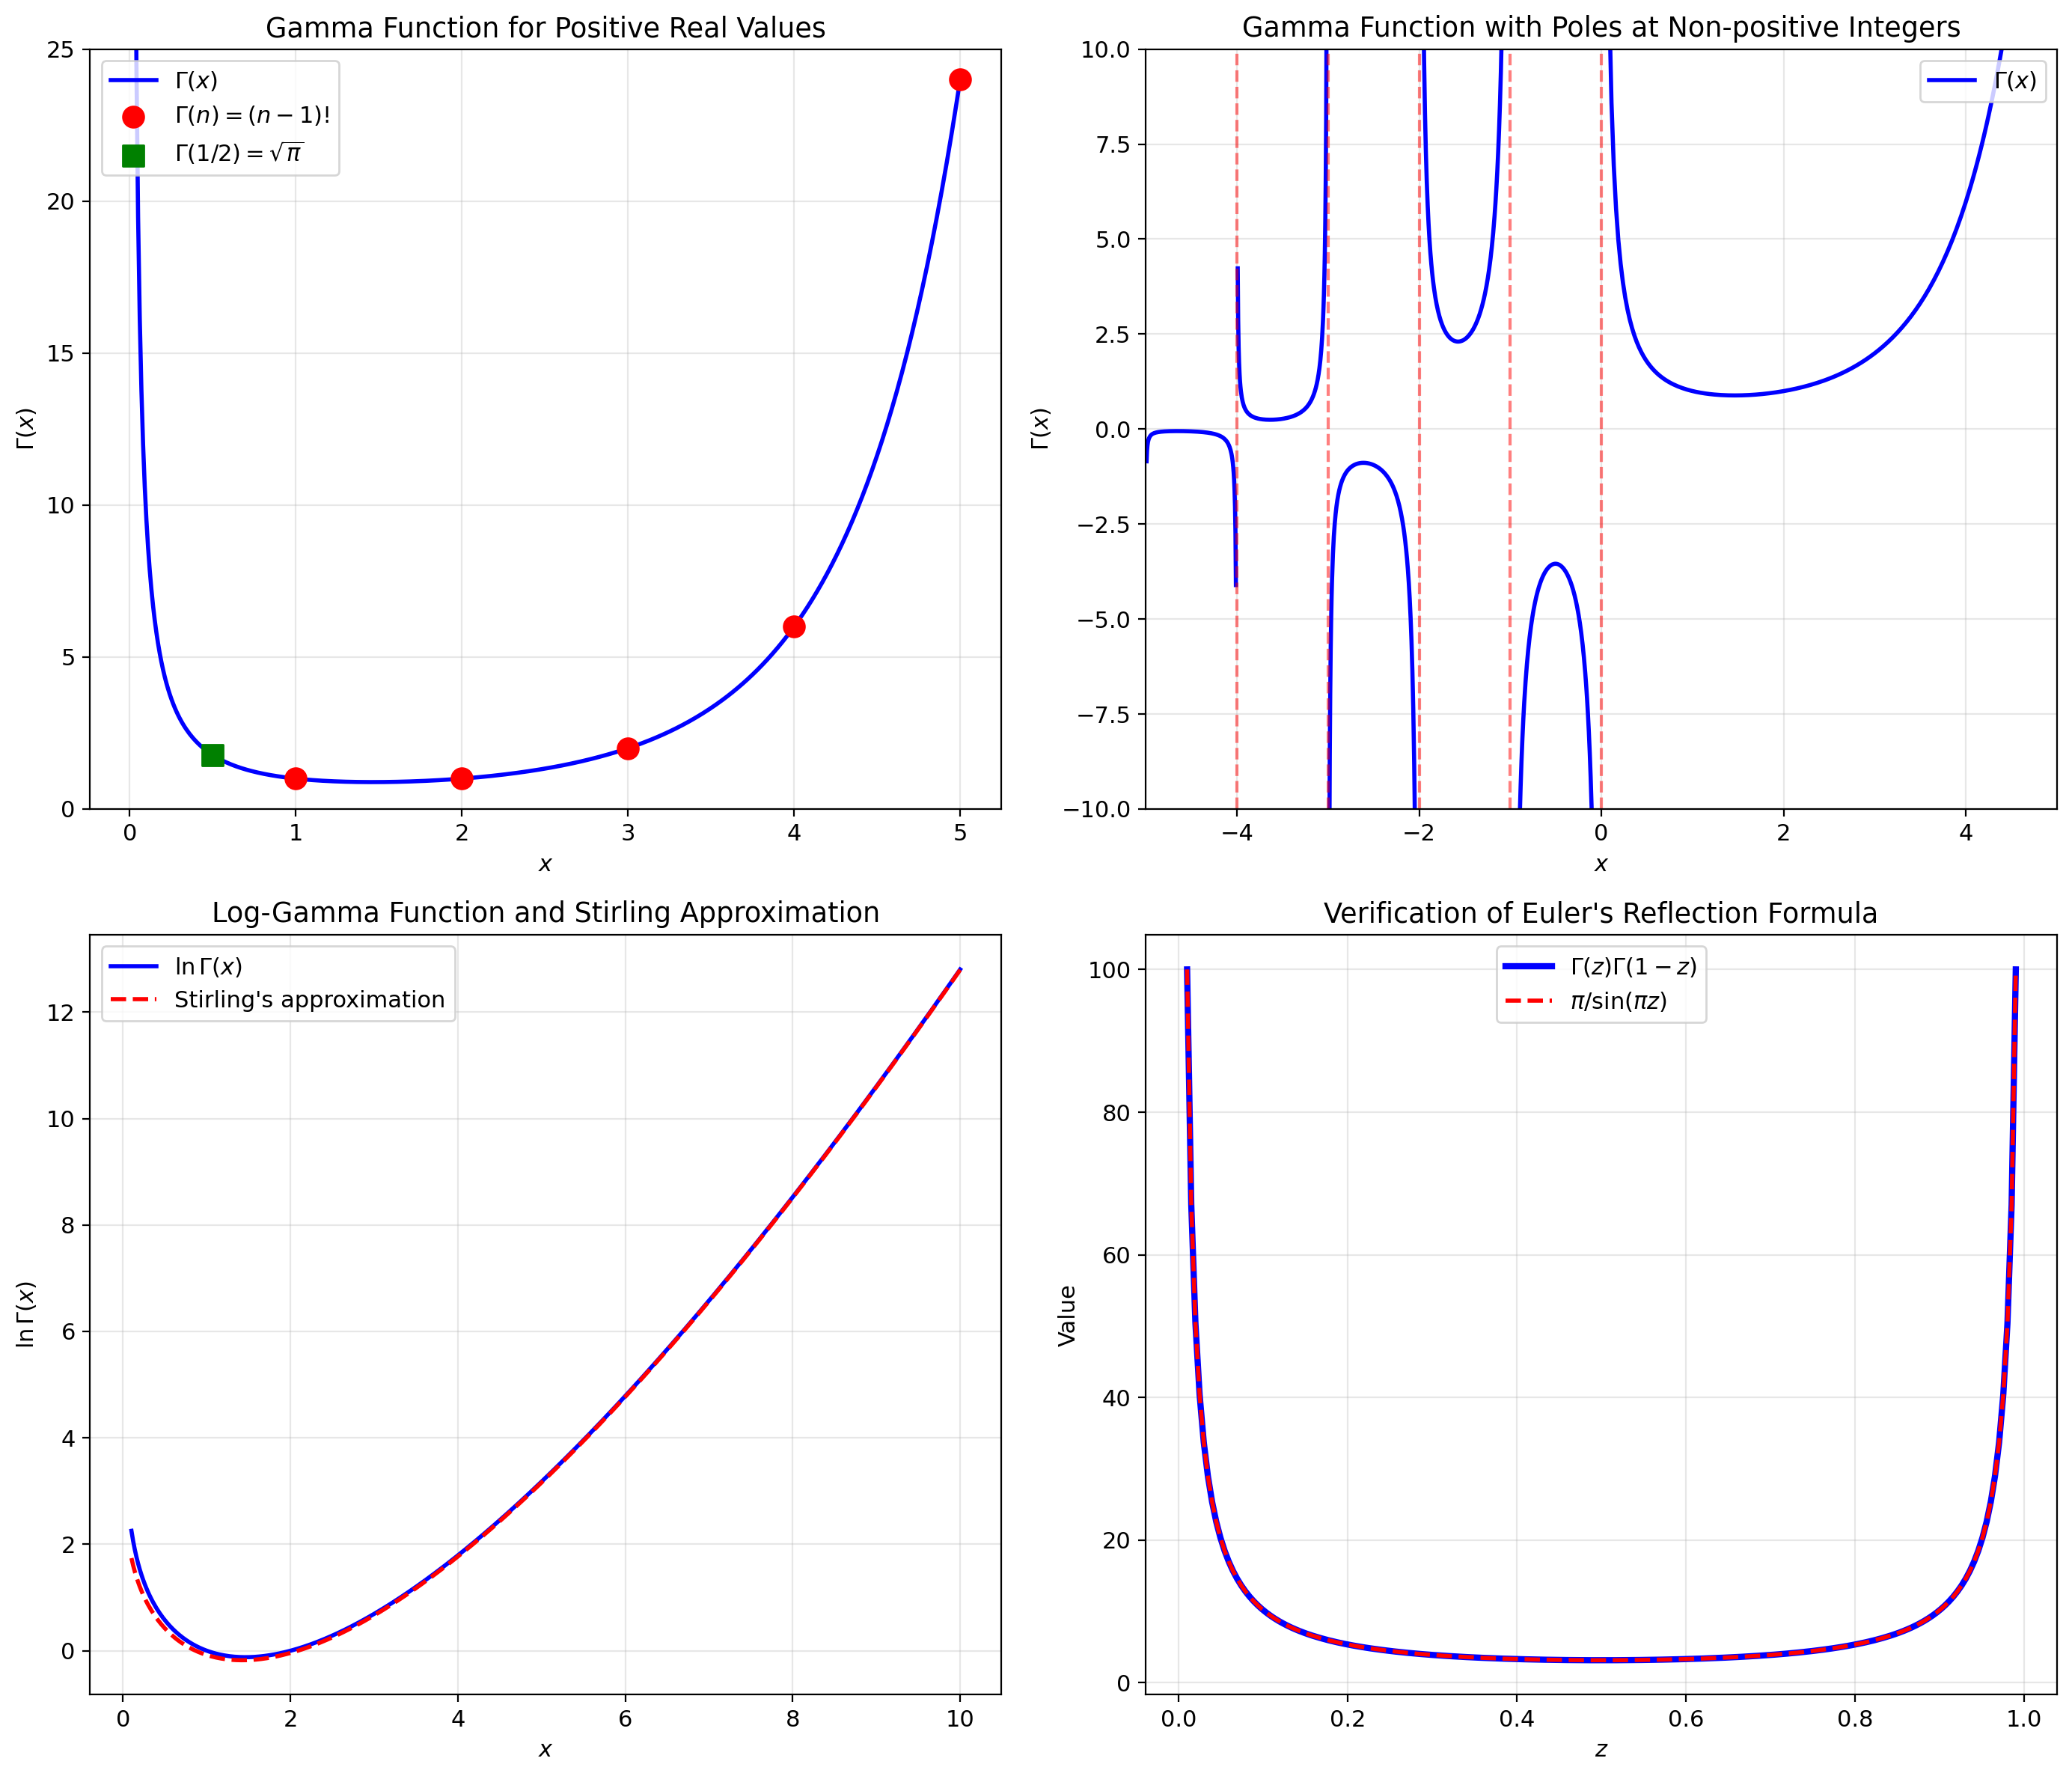

Plot saved to 'plot.png'


In [2]:
# Create figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Gamma function for positive real values
ax1 = axes[0, 0]
x_pos = np.linspace(0.01, 5, 500)
y_gamma = special.gamma(x_pos)

ax1.plot(x_pos, y_gamma, 'b-', linewidth=2, label=r'$\Gamma(x)$')

# Mark factorial values
integers = np.arange(1, 6)
factorials = special.gamma(integers)
ax1.scatter(integers, factorials, color='red', s=100, zorder=5, 
            label=r'$\Gamma(n) = (n-1)!$')

# Mark Gamma(1/2) = sqrt(pi)
ax1.scatter([0.5], [np.sqrt(np.pi)], color='green', s=100, zorder=5,
            marker='s', label=r'$\Gamma(1/2) = \sqrt{\pi}$')

ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$\Gamma(x)$')
ax1.set_title('Gamma Function for Positive Real Values')
ax1.set_ylim([0, 25])
ax1.legend(loc='upper left')

# Plot 2: Gamma function extended to negative values (showing poles)
ax2 = axes[0, 1]

# Plot in segments to avoid connecting across poles
segments = [(-4.99, -4.01), (-3.99, -3.01), (-2.99, -2.01), 
            (-1.99, -1.01), (-0.99, -0.01), (0.01, 5)]

for i, (start, end) in enumerate(segments):
    x_seg = np.linspace(start, end, 200)
    y_seg = special.gamma(x_seg)
    label = r'$\Gamma(x)$' if i == 0 else None
    ax2.plot(x_seg, y_seg, 'b-', linewidth=2, label=label)

# Mark poles
poles = [0, -1, -2, -3, -4]
for pole in poles:
    ax2.axvline(x=pole, color='red', linestyle='--', alpha=0.5)

ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$\Gamma(x)$')
ax2.set_title('Gamma Function with Poles at Non-positive Integers')
ax2.set_ylim([-10, 10])
ax2.set_xlim([-5, 5])
ax2.legend(loc='upper right')

# Plot 3: Log-Gamma function (more numerically stable)
ax3 = axes[1, 0]
x_log = np.linspace(0.1, 10, 500)
y_loggamma = special.gammaln(x_log)

ax3.plot(x_log, y_loggamma, 'b-', linewidth=2, label=r'$\ln\Gamma(x)$')

# Compare with Stirling's approximation
stirling = 0.5 * np.log(2 * np.pi / x_log) + x_log * np.log(x_log / np.e)
ax3.plot(x_log, stirling, 'r--', linewidth=2, 
         label=r"Stirling's approximation")

ax3.set_xlabel(r'$x$')
ax3.set_ylabel(r'$\ln\Gamma(x)$')
ax3.set_title('Log-Gamma Function and Stirling Approximation')
ax3.legend(loc='upper left')

# Plot 4: Verification of the reflection formula
ax4 = axes[1, 1]
x_refl = np.linspace(0.01, 0.99, 200)

# LHS: Gamma(z) * Gamma(1-z)
lhs = special.gamma(x_refl) * special.gamma(1 - x_refl)

# RHS: pi / sin(pi*z)
rhs = np.pi / np.sin(np.pi * x_refl)

ax4.plot(x_refl, lhs, 'b-', linewidth=3, label=r'$\Gamma(z)\Gamma(1-z)$')
ax4.plot(x_refl, rhs, 'r--', linewidth=2, label=r'$\pi/\sin(\pi z)$')

ax4.set_xlabel(r'$z$')
ax4.set_ylabel('Value')
ax4.set_title('Verification of Euler\'s Reflection Formula')
ax4.legend(loc='upper center')

plt.tight_layout()
plt.savefig('gamma_function_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("Plot saved to 'plot.png'")

### Numerical Verification of Key Properties

In [3]:
import math

print("=" * 60)
print("VERIFICATION OF GAMMA FUNCTION PROPERTIES")
print("=" * 60)

# 1. Verify factorial relationship
print("\n1. Factorial Relationship: Γ(n+1) = n!")
print("-" * 40)
for n in range(1, 8):
    gamma_val = special.gamma(n + 1)
    factorial_val = math.factorial(n)
    print(f"   Γ({n+1}) = {gamma_val:.6f}, {n}! = {factorial_val}")

# 2. Verify recurrence relation
print("\n2. Recurrence Relation: Γ(z+1) = z·Γ(z)")
print("-" * 40)
test_values = [0.5, 1.5, 2.3, 3.7, np.pi]
for z in test_values:
    lhs = special.gamma(z + 1)
    rhs = z * special.gamma(z)
    error = abs(lhs - rhs)
    print(f"   z = {z:.4f}: Γ(z+1) = {lhs:.6f}, z·Γ(z) = {rhs:.6f}, error = {error:.2e}")

# 3. Verify special value Γ(1/2) = √π
print("\n3. Special Value: Γ(1/2) = √π")
print("-" * 40)
gamma_half = special.gamma(0.5)
sqrt_pi = np.sqrt(np.pi)
print(f"   Γ(1/2) = {gamma_half:.10f}")
print(f"   √π     = {sqrt_pi:.10f}")
print(f"   Error  = {abs(gamma_half - sqrt_pi):.2e}")

# 4. Verify reflection formula
print("\n4. Reflection Formula: Γ(z)Γ(1-z) = π/sin(πz)")
print("-" * 40)
test_z = [0.25, 0.5, 0.75, 1/3, 2/3]
for z in test_z:
    lhs = special.gamma(z) * special.gamma(1 - z)
    rhs = np.pi / np.sin(np.pi * z)
    error = abs(lhs - rhs)
    print(f"   z = {z:.4f}: LHS = {lhs:.6f}, RHS = {rhs:.6f}, error = {error:.2e}")

# 5. Verify duplication formula
print("\n5. Duplication Formula: Γ(z)Γ(z+1/2) = √π·Γ(2z)/2^(2z-1)")
print("-" * 40)
test_z = [1.0, 1.5, 2.0, 2.5]
for z in test_z:
    lhs = special.gamma(z) * special.gamma(z + 0.5)
    rhs = np.sqrt(np.pi) * special.gamma(2 * z) / (2 ** (2 * z - 1))
    error = abs(lhs - rhs)
    print(f"   z = {z:.4f}: LHS = {lhs:.6f}, RHS = {rhs:.6f}, error = {error:.2e}")

print("\n" + "=" * 60)

VERIFICATION OF GAMMA FUNCTION PROPERTIES

1. Factorial Relationship: Γ(n+1) = n!
----------------------------------------
   Γ(2) = 1.000000, 1! = 1
   Γ(3) = 2.000000, 2! = 2
   Γ(4) = 6.000000, 3! = 6
   Γ(5) = 24.000000, 4! = 24
   Γ(6) = 120.000000, 5! = 120
   Γ(7) = 720.000000, 6! = 720
   Γ(8) = 5040.000000, 7! = 5040

2. Recurrence Relation: Γ(z+1) = z·Γ(z)
----------------------------------------
   z = 0.5000: Γ(z+1) = 0.886227, z·Γ(z) = 0.886227, error = 0.00e+00
   z = 1.5000: Γ(z+1) = 1.329340, z·Γ(z) = 1.329340, error = 0.00e+00
   z = 2.3000: Γ(z+1) = 2.683437, z·Γ(z) = 2.683437, error = 0.00e+00
   z = 3.7000: Γ(z+1) = 15.431412, z·Γ(z) = 15.431412, error = 3.55e-15
   z = 3.1416: Γ(z+1) = 7.188083, z·Γ(z) = 7.188083, error = 0.00e+00

3. Special Value: Γ(1/2) = √π
----------------------------------------
   Γ(1/2) = 1.7724538509
   √π     = 1.7724538509
   Error  = 0.00e+00

4. Reflection Formula: Γ(z)Γ(1-z) = π/sin(πz)
----------------------------------------
   z = 

### The Beta Function Connection

The Beta function $B(a,b)$ is closely related to the Gamma function:

$$B(a, b) = \int_0^1 t^{a-1}(1-t)^{b-1} \, dt = \frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}$$

In [4]:
print("\nBeta-Gamma Relationship: B(a,b) = Γ(a)Γ(b)/Γ(a+b)")
print("-" * 50)

test_pairs = [(1, 1), (2, 3), (0.5, 0.5), (1.5, 2.5), (3, 4)]

for a, b in test_pairs:
    beta_direct = special.beta(a, b)
    beta_via_gamma = special.gamma(a) * special.gamma(b) / special.gamma(a + b)
    error = abs(beta_direct - beta_via_gamma)
    print(f"   B({a}, {b}): Direct = {beta_direct:.6f}, Via Γ = {beta_via_gamma:.6f}, error = {error:.2e}")


Beta-Gamma Relationship: B(a,b) = Γ(a)Γ(b)/Γ(a+b)
--------------------------------------------------
   B(1, 1): Direct = 1.000000, Via Γ = 1.000000, error = 0.00e+00
   B(2, 3): Direct = 0.083333, Via Γ = 0.083333, error = 0.00e+00
   B(0.5, 0.5): Direct = 3.141593, Via Γ = 3.141593, error = 0.00e+00
   B(1.5, 2.5): Direct = 0.196350, Via Γ = 0.196350, error = 2.78e-17
   B(3, 4): Direct = 0.016667, Via Γ = 0.016667, error = 0.00e+00


## Applications

The Gamma function appears throughout mathematics and physics:

1. **Probability Theory**: The Gamma distribution $f(x; k, \theta) = \frac{x^{k-1}e^{-x/\theta}}{\theta^k \Gamma(k)}$

2. **Quantum Mechanics**: Normalization of wave functions in spherical coordinates

3. **String Theory**: Veneziano amplitude uses Gamma functions

4. **Combinatorics**: Generalizing binomial coefficients to complex numbers

5. **Number Theory**: Analytic continuation of the Riemann zeta function

## Conclusion

The Gamma function is a fundamental special function that:

- Extends the factorial to all complex numbers (except non-positive integers)
- Satisfies elegant functional equations (recurrence, reflection, duplication)
- Has deep connections to other special functions and probability distributions
- Provides essential tools for mathematical analysis and theoretical physics

The numerical experiments above confirm the theoretical properties with machine precision, demonstrating both the mathematical elegance and computational reliability of this remarkable function.